In [2]:
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/20/6a/e5fff2ed776ab0cd11d7c1d5d3e5e549952464a6f1b9084b7ecbd8341352/kiwisolver-1.1.0-cp37-none-win32.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
weather = pd.read_csv("https://raw.githubusercontent.com/alanjones2/dataviz/master/londonweather.csv")
weather.tail(15)

,Year,Month,Tmax,Tmin,Rain,Sun
733,2018,2,6.7,0.6,29.0,92.0
734,2018,3,9.8,3.0,81.2,70.3
735,2018,4,15.5,7.9,65.2,113.4
736,2018,5,20.8,9.8,58.4,248.3
737,2018,6,24.2,13.1,0.4,234.5
738,2018,7,28.3,16.4,14.8,272.5
739,2018,8,24.5,14.5,48.2,182.1
740,2018,9,20.9,11.0,29.4,195.0
741,2018,10,16.5,8.5,61.0,137.0
742,2018,11,12.2,5.8,73.8,72.9


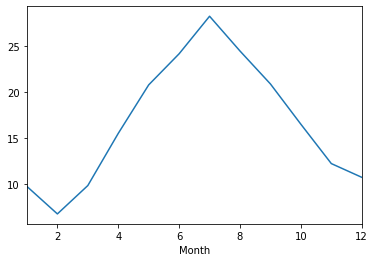

In [55]:
y2018 = weather [weather.Year == 2018]
y2018.plot(x ='Month', y ='Tmax', legend = False)
plt.show()

In [18]:
df1 = weather [weather.Year > 2010]
df = df1 [df1.Year < 2019]
df 


,Year,Month,Tmax,Tmin,Rain,Sun
648,2011,1,7.4,2.8,76.8,35.6
649,2011,2,10.2,4.8,42.8,36.2
650,2011,3,12.3,3.8,14.6,126.4
651,2011,4,19.7,8.6,2.4,218.0
652,2011,5,19.4,9.4,24.6,218.0
...,...,...,...,...,...,...
739,2018,8,24.5,14.5,48.2,182.1
740,2018,9,20.9,11.0,29.4,195.0
741,2018,10,16.5,8.5,61.0,137.0
742,2018,11,12.2,5.8,73.8,72.9


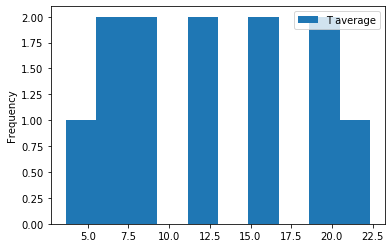

,Year,Month,Tmax,Tmin,Rain,Sun,T average
0,1957,1,8.7,2.7,39.5,53.0,5.70
1,1957,2,9.0,2.9,69.8,64.9,5.95
2,1957,3,13.9,5.7,25.4,96.7,9.80
3,1957,4,14.2,5.2,5.7,169.6,9.70
4,1957,5,16.2,6.5,21.3,195.0,11.35


In [59]:
def get_tem_ave(row):
    return (row.Tmax + row.Tmin)/2   
weather['T average'] = weather.apply(get_tem_ave, axis=1)
y2018.plot(kind = 'hist',x = 'Month' , y ='T average')
plt.show()

weather.head(5)

In [28]:
import plotly.express as px
colors = ['Green', 'Red', 'Yellow']

colors

['Green', 'Red', 'Yellow']

In [40]:
fig = px.scatter_polar(df, r="Tmin", theta="Month", color="Tmax",
            color_discrete_sequence=px.colors.sequential.Plasma_r , animation_frame ="Year", template="plotly_dark")
fig.show()

In [21]:
#weather['T average'] = (weather.Tmax + weather.Tmin)/2


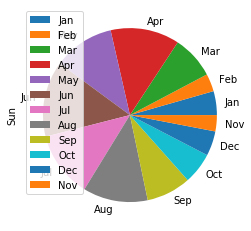

In [53]:
y2018.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Dec','Nov']
# legend = False this
y2018.plot(kind ='pie', y ='Sun')

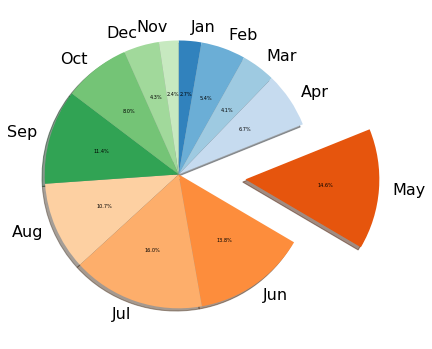

In [67]:
explode = (0, 0,0,0,0.5,0,0,0,0,0,0,0)
fig, ax = plt.subplots(figsize = (6,8))
y2018.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Dec','Nov']
#patches, texts, autotexts = ax.pie(y2018.Sun, labels=y2018.index,
#        explode=explode,  autopct='%1.1f%%', # format autotext
 #       colors=plt.cm.tab20c.colors,
 #       shadow=True, startangle=90, counterclock=False) 
#[_.set_fontsize(16) for _ in autotexts] 


A =  ax.pie ( y2018.Sun, labels = y2018.index, explode = explode, shadow = True, colors = plt.cm.tab20c.colors,
             autopct='%1.1f%%', startangle = 90, counterclock = False )
patches, texts, autotexts  = A
[i.set_fontsize(16) for i in texts]
[_.set_fontsize(5) for _ in autotexts] 
plt.show()

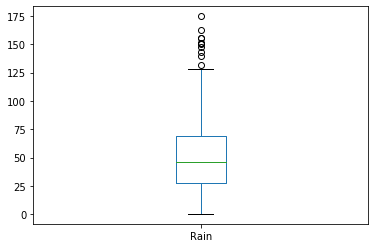

In [48]:
weather.plot.box(y= 'Rain')